In [1]:
from tools import *
import matplotlib.pyplot as plt
import cv2

In [15]:
get_aligned_images("test/", "aligned_images/")

Wrote result aligned_images/original.png
Wrote result aligned_images/test.png
Wrote result aligned_images/makeup2.png
Wrote result aligned_images/makeup1.png


In [2]:
get_aligned_images("private_test/", "aligned_images/")

Wrote result aligned_images/photo_100.png
Wrote result aligned_images/IMG_1811.png


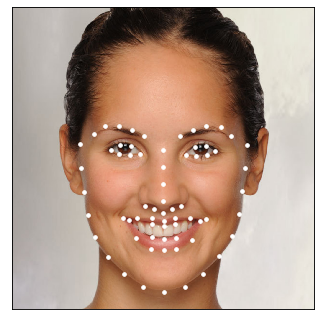

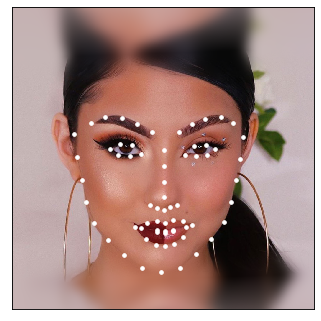

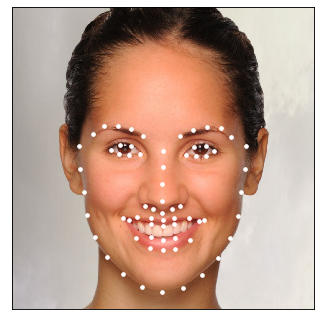

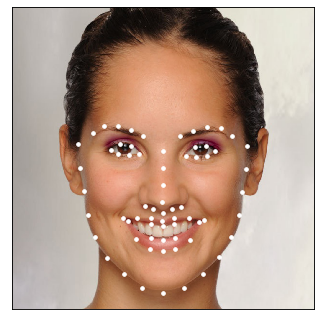

In [16]:
preds = get_draw_prediction_directory("aligned_images/")

In [17]:
im = plt.imread("aligned_images/test.png")
preds_1 = preds["aligned_images/test.png"]

predictions = get_features(preds_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


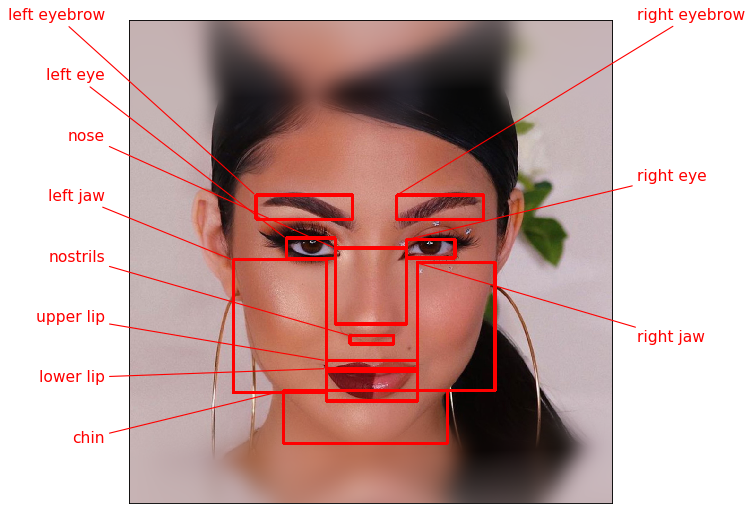

In [18]:
im_new = drawAnnotations(im, predictions)

In [4]:
private_img = "aligned_images/IMG_1811.png"

im = plt.imread(private_img)
preds_1 = get_landmarks_img(private_img)[private_img]
predictions = get_features(preds_1)
im_new = drawAnnotations(im, predictions)

In [7]:
import requests, time, os, shutil
from multiprocessing.dummy import Pool

clusterMin=5
clusterK=10
redImgSize=20
detImgSize=10

azureKey="b2101b2ed9744c51b7dd0c0e7ecad979"

def search(search_term, azureKey):
    print('searching using bing: "'+search_term+'"')
    search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"
    subscription_key = azureKey
    assert subscription_key
    headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
    params  = {"q": search_term, "imageType": "Photo","count":100}
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json()
    result=[]
    for i in search_results['value']:
        result.append(i['thumbnailUrl'])
    return result


def download(links_in, dir_name, n=None):
    links = links_in[:n]
    print('search results',len(links))
    if os.path.exists(dir_name):
        print('using cache')
        return

    tempName=dir_name+'-'+str(int(time.time()))
    os.makedirs(tempName)
    def fetch(url):
        r=requests.get(url[0], stream=True)
        with open(tempName+'/'+str(url[1]).zfill(4)+".jpg", 'wb') as out_file:
            shutil.copyfileobj(r.raw, out_file)

    modLinks=[[links[i],i+1] for i in range(len(links))]
    Pool(10).map(fetch, modLinks)
    
    try:
        os.rename(tempName,dir_name)
    except:
        shutil.rmtree(tempName)

    print('Items downloaded',len(links))

In [5]:
words_searching = "Lady Gaga"
words_searching = words_searching.replace(' ','_')
cache_path = "downloaded/"

results = search(words_searching, azureKey)
download(results, cache_path + words_searching)

searching using bing: "Lady_Gaga"
search results 100
using cache


In [ ]:
def compare_color_or_gray(image_path):
    image = cv.imread(image_path)

    b_hist = cv.calcHist([image], [0], None, [256], [0, 256])
    g_hist = cv.calcHist([image], [1], None, [256], [0, 256])
    r_hist = cv.calcHist([image], [2], None, [256], [0, 256])

    b_2_g = cv.compareHist(b_hist, g_hist, cv.HISTCMP_CORREL)
    g_2_r = cv.compareHist(g_hist, r_hist, cv.HISTCMP_CORREL)
    r_2_b = cv.compareHist(r_hist, b_hist, cv.HISTCMP_CORREL)

    CORREL_ABS = np.abs(b_2_g - g_2_r) + \
                 np.abs(g_2_r - r_2_b) + \
                 np.abs(r_2_b - b_2_g)

    if CORREL_ABS < 0.09:
        return True
    else:
        return False

In [6]:
get_aligned_images(cache_path + words_searching, cache_path + words_searching + "_aligned", output_size=256, verbose=False)


In [10]:
from beautyGAN.model import beautyGAN

In [16]:
bGAN = beautyGAN()

INFO:tensorflow:Restoring parameters from beautyGAN/model/model


In [17]:
bGAN.generate("aligned_images/original.png", cache_path + words_searching + "_aligned")

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[]

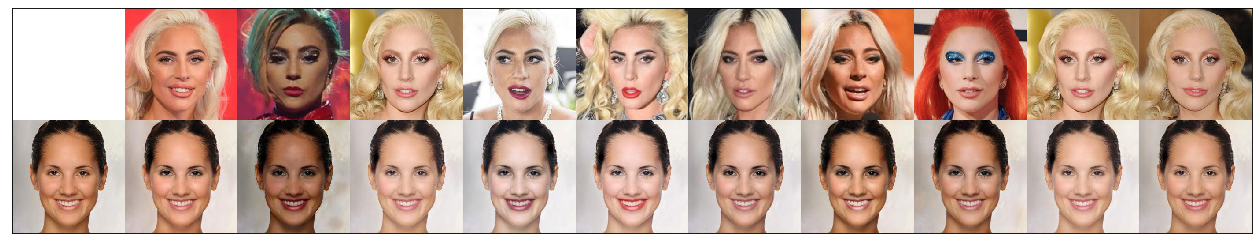

In [18]:
im = plt.imread('result.jpg')
_, ax = plt.subplots(figsize=(20,8), dpi=80)
ax.imshow(im)
ax.set_yticks([])
ax.set_xticks([])